In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize

In [12]:
data = np.load('X-y.npz')
X = data['X']
y = data['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17)

# SMOTE to balance my dataset
smote = SMOTE(random_state=42)
x_sm, y_sm = smote.fit_resample(X_train, y_train)

X_train = np.concatenate((X_train, x_sm), axis = 0)
y_train = np.concatenate((y_train, y_sm), axis = 0)

In [14]:
# Initialize the Logistic Regression classifier
classifier = LogisticRegression(C=2, solver="lbfgs", max_iter=300)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predict on the test data
y_predict = classifier.predict(X_val)

# Evaluate the classifier
accuracy = accuracy_score(y_val, y_predict)
print("Accuracy: ", accuracy)
target_names = ['0 <= y < 2.5', '2.5 <= y < 4.0', '4.0 <= y <= 5']
print("\nClassification Report:\n", classification_report(y_val, y_predict, target_names=target_names))

Accuracy:  0.6595744680851063

Classification Report:
                 precision    recall  f1-score   support

  0 <= y < 2.5       0.00      0.00      0.00         2
2.5 <= y < 4.0       0.82      0.80      0.81        35
 4.0 <= y <= 5       0.75      0.30      0.43        10

      accuracy                           0.66        47
     macro avg       0.52      0.37      0.41        47
  weighted avg       0.77      0.66      0.70        47



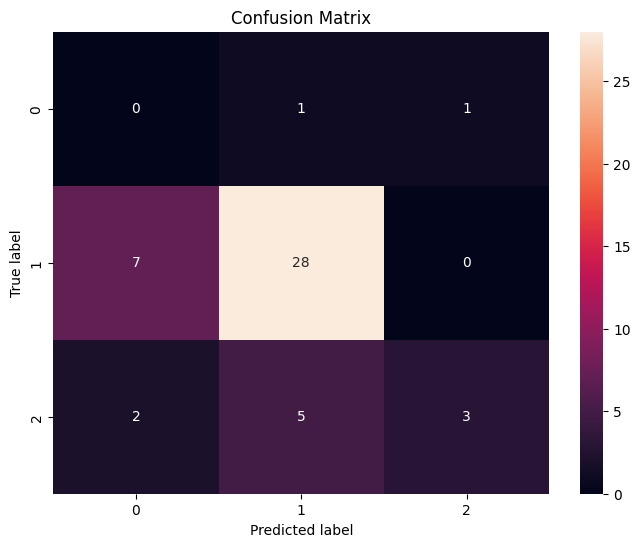

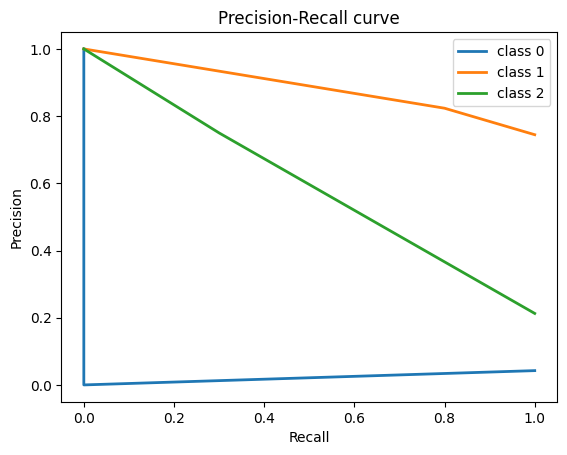

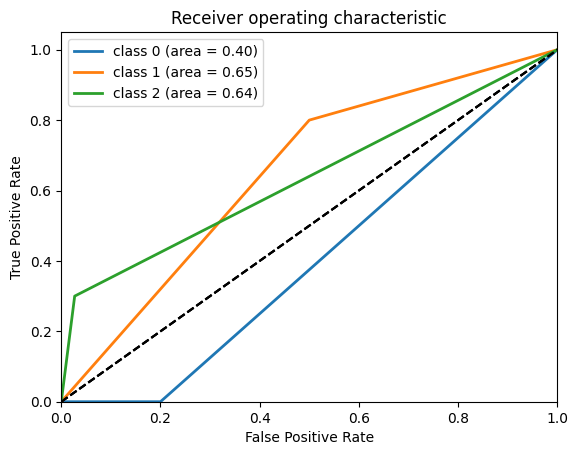

In [15]:
# Assuming y_test and y_predict are your true labels and predictions
# For multi-class classification, you need to binarize the labels for ROC and Precision-Recall curves
n_classes = 3  # Number of classes
y_test_binarized = label_binarize(y_val, classes=[0, 1, 2])
y_predict_binarized = label_binarize(y_predict, classes=[0, 1, 2])

# Plotting the confusion matrix
cm = confusion_matrix(y_val, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plotting Precision-Recall curve and ROC curve for each class
for i in range(n_classes):
    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_predict_binarized[:, i])
    plt.plot(recall, precision, lw=2, label=f'class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc='best')
plt.show()

for i in range(n_classes):
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_predict_binarized[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'class {i} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='best')
plt.show()